In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 640.0 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 648.1 kB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Initial Data Shape: (89184, 84)
Unique values in 'Employment' column: [nan 'Employed, full-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Student, full-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time'
 'Not employed, but looking for work;Student, full-time'
 'Employed, part-time;Student, part-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time' 'I prefer not to say'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Student, part-time'
 'Not employed, but looking for work;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Retired' 'Employed, full-time;Student, full-time'
 'Student, full-time;Student, part-time'
 'Independent contractor, freelancer, or self-e

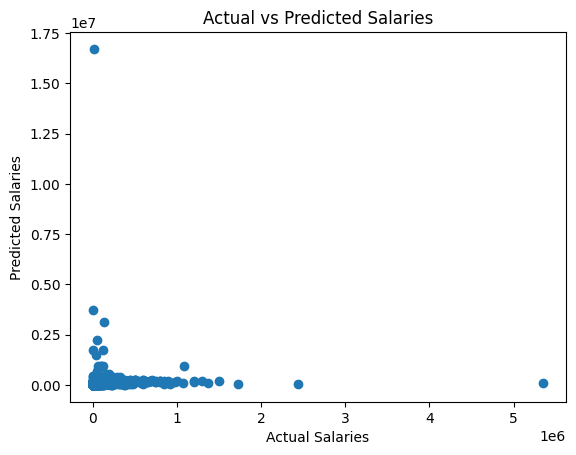

array([197887.31386493, 183123.67767666, 165527.00101374, ...,
        15507.58193353,  77075.16088097,  33847.42215079])

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Load the dataset
df = pd.read_csv("survey_results_public.csv")
print("Initial Data Shape:", df.shape)

# Inspect unique values in the "Employment" column
print("Unique values in 'Employment' column:", df["Employment"].unique())

# Select relevant columns and rename if necessary
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
print("Data Shape after selecting columns and renaming:", df.shape)

# Drop rows with missing values
df = df.dropna()
print("Data Shape after dropping NA:", df.shape)

# Filter for full-time employment (adjust if necessary based on unique values)
df = df[df["Employment"].str.contains("full-time", case=False, na=False)]
print("Data Shape after filtering for full-time employment:", df.shape)

# Drop the 'Employment' column
df = df.drop("Employment", axis=1)
print("Data Shape after dropping 'Employment' column:", df.shape)

# Encode categorical variables
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])

# Ensure YearsCodePro is treated as a numeric feature
df['YearsCodePro'] = df['YearsCodePro'].apply(lambda x: float(x) if x.isdigit() else 0.0)
print("Data Types after encoding and converting YearsCodePro:", df.dtypes)

# Feature matrix and target vector
X = df.drop("Salary", axis=1).values
y = df["Salary"].values

# Print shapes of X and y to verify they contain data
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train and Test Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Visualizing predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs Predicted Salaries")
plt.show()

# Making predictions on the entire dataset
y_pred_all = model.predict(X)

# Save the model and label encoders
data = {"model": model, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

# Load the model and label encoders
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

# Predict using the loaded model
y_pred_loaded = regressor_loaded.predict(X)
y_pred_loaded
